<h3>Лабораторная работа №4</h3>
<p style="font-size: 16px">Исследование моделей размещения пользователей и
распространения сигнала</p>
<hr>
<p style="font-size: 14px">Цель:</p>
<ol>
    <li>Исследование сценарий размещения пользователей на плоскости и расчет
вероятностей блокировок прямой видимости.</li>
</ol>
<hr>
<p><b><u>Задание</u></b></p>
<ol style="width: 60%">Построить согласно описанному ниже алгоритму имитационную модель,
позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнить
полученную характеристику с результатами математической модели.
    <li>В квадратной области со стороной А согласно точечному Пуассоновскому
процессу с плотностью q разместить объекты (окружности с фиксированным
радиусом r), которые могут заблокировать линию прямой видимости между двумя
точками, размещенными на расстоянии x друг от друга внутри обозначенной
области. Проверить блокирует ли хотя бы один объект линию прямой видимости.</li>
    <li>Количество блокирующих объектов определяется согласно распределению
Пуассона с параметром qA2
, а объекты вбрасываются независимо друг от друга.
При этом центры блокирующих объектов должны быть распределены равномерно
внутри рассматриваемой области.</li>
    На основе описанного выше алгоритма получить 1000 реализаций факта блокировки
линии прямой видимости и рассчитать вероятность блокировки линии прямой
видимости в поле блокирующих объектов. Полученный результат сравнить с
результатами математической модели
</ol>
<hr>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math as m

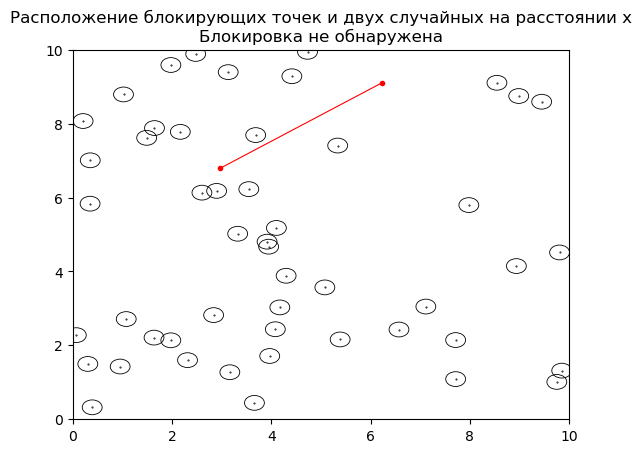

In [7]:
# Вводим константы
A = 10   # Сторона квадрата
q = 0.5  # Плотность блокирующих объектов
r = 0.2  # Радиус окружности блокирующего объекта
x = 4    # Расстояние между двумя точками для 1ого задания

# Определяем расположение точек согласно плотности
def giveMeLockingObjects():
    xDots = np.random.uniform(low = 0, high = A, size = int(q * A ** 2))
    yDots = np.random.uniform(low = 0, high = A, size = int(q * A ** 2))
    return xDots, yDots

# Получаем точки
xDots, yDots = giveMeLockingObjects();

# Получаем оси и строим точки блокирующих объектов
fig, ax = plt.subplots()
ax.scatter(xDots, yDots, s = 0.2, color = "black")

# Рисуем окружности для удобства восприятия
for i in range(len(xDots)):
    circ = patches.Circle((xDots[i], yDots[i]), radius = r, fill = False, lw = 0.6, ls = 'solid', edgecolor = 'black')
    ax.add_patch(circ)

# После подготовительных работ, необходимо выбрать пару точек на расстоянии х случайно.
# Выбрал такой путь: первую точку генерируем случайно, а для второй генерируем случайных угол, если угол выводит за пределы
# квадрата, генерируем угол заново

xFirst = np.random.uniform(low = 0, high = A)
yFirst = np.random.uniform(low = 0, high = A)

xSecond = 0.0
ySecond = 0.0

while(True):
    angle = np.random.uniform(low = 0, high = 2 * m.pi)
    xSecond = m.cos(angle) * x + xFirst
    ySecond = m.sin(angle) * x + yFirst
    if ((0 <= xSecond <= A) and (0 <= ySecond <= A)):
        break

# Строим точки на график
ax.plot([xFirst, xSecond], [yFirst, ySecond], linewidth = 0.8, color = 'red', marker = 'o', markersize = 3)

# Функция для определения блокировки между двумя точками
# Делим отрезок, соединяющий две случайные точки на множество точек и проверяем расстояние до всех блокирующих объектов,
# если такое расстояние меньше - имеем блокировку
def checkIfLocked(xFirst, yFirst, xSecond, ySecond, xLockDots, yLockDots):
    xToCheck = np.linspace(xFirst, xSecond, 100)
    yToCheck = np.linspace(yFirst, ySecond, 100)

    for j in range(len(xToCheck)):
        for i in range(len(xLockDots)):
            if (m.sqrt((xToCheck[j] - xLockDots[i]) ** 2 + (yToCheck[j] - yLockDots[i]) ** 2) < r): return False

    return True

title = 'Расположение блокирующих точек и двух случайных на расстоянии x'
if (checkIfLocked(xFirst, yFirst, xSecond, ySecond, xDots, yDots)):
    title += "\nБлокировка не обнаружена"
else:
    title += "\nБлокировка обнаружена"

plt.xlim([0, A])
plt.ylim([0, A])
plt.title(title)
plt.show()

<hr>
Для сравнения с математической моделью используем ту же функцию

In [8]:
xLocks, yLocks = giveMeLockingObjects()

# Считаем вероятность блокировки как часть заблокированных пар точек
totalChecks = 1000
totalLocks  = 0

mathP = 0

for i in range(totalChecks):
    # Генерируем точки
    xFirst = np.random.uniform(low = 0, high = A)
    yFirst = np.random.uniform(low = 0, high = A)
    xSecond = np.random.uniform(low = 0, high = A)
    ySecond = np.random.uniform(low = 0, high = A)
    
    if (not checkIfLocked(xFirst, yFirst, xSecond, ySecond, xLocks, yLocks)):
        totalLocks += 1

    # Расчёт вероятности по формуле, для согласования со случайным расстоянием между точками
    mathP += (1 - m.exp(- q * 2 * r * (m.sqrt( (xFirst - xSecond) ** 2 + (yFirst - ySecond) ** 2 ) + r ) )) / 1000

print('Экспериментальный результат вероятности блокировки = %.3f' %(totalLocks / totalChecks))
print('Теоретический результат блокировки %.3f' %(mathP))

Экспериментальный результат вероятности блокировки = 0.579
Теоретический результат блокировки 0.616


Разница меняется от генерации к генерации, по субъективным наблюдениям, средняя разница между теоретической блокировкой и генеративной абсолютная разница составляет 0.04, что вполне приемлимо для оценки вероятности блокриовки в динамике процесса.

<hr>
<h3>Выводы:</h3>
<ol>
    <li>Исследовали сценарии расположения пользователей на плоскости и рассчитали вероятность блокировки</li>
    <li>Сравнили генеративные и теоретические вероятности блокировок</li>
</ol>